[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
10000
22029
--------------
Modelul 1
--------------
0.33 0.6904
[[1373  411  216]
 [ 371  967  162]
 [ 268  120 1112]]


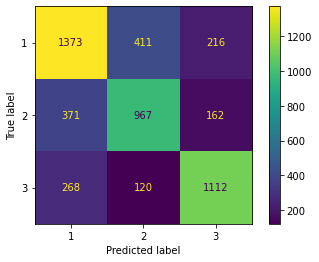

--------------
Modelul 2
1e-06 0.6398
[[1172  488  340]
 [ 333  945  222]
 [ 218  200 1082]]


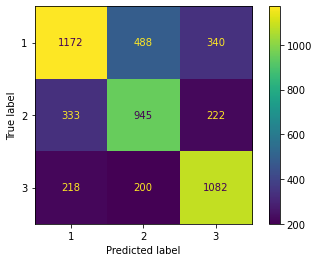

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).mean()


# Data reading
data_train_samples = pd.read_csv('data/train_samples.txt', sep="	", header=None)
data_train_labels = pd.read_csv('data/train_labels.txt', sep="	", header=None)

data_validation_samples = pd.read_csv('data/validation_samples.txt', sep="	", header=None)
data_validation_labels = pd.read_csv('data/validation_labels.txt', sep="	", header=None)

data_test_samples = pd.read_csv('data/test_samples.txt', sep="	", header=None)

train_ids = data_train_samples[0]
train_data = data_train_samples[1]
train_labels = data_train_labels[1]

validation_ids = data_validation_samples[0]
validation_data = data_validation_samples[1]
validation_labels = data_validation_labels[1]

test_ids = data_test_samples[0]
test_data = data_test_samples[1]

ytrain = train_labels.astype('int')
yvalidation = validation_labels.astype('int')

# Text preprocessing and scaling
cv = CountVectorizer(encoding='str', strip_accents='unicode')

xtrain = cv.fit_transform(train_data)
xvalidation = cv.transform(validation_data)
xtest = cv.transform(test_data)

xtrain = xtrain.toarray()
xvalidation = xvalidation.toarray()
xtest = xtest.toarray()

print(xtrain)
print(len(xtrain))
print(len(xtrain[0]))

# Model1
print('--------------')
print('Modelul 1')

# alphaList = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.01, 0.02, 0.03,
#              0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.001]
# print('--------------')
# for alphaValue in alphaList:
#     mnb = MultinomialNB(alpha=alphaValue)
#     mnb.fit(xtrain, ytrain)
#     predicted = mnb.predict(xvalidation)
#     print(alphaValue, accuracy_score(predicted, yvalidation), sep=" ")

# alphaList = [0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47,
#              0.48, 0.49, 0.5]
# print('--------------')
# for alphaValue in alphaList:
#     mnb = MultinomialNB(alpha=alphaValue)
#     mnb.fit(xtrain, ytrain)
#     predicted = mnb.predict(xvalidation)
#     print(alphaValue, accuracy_score(predicted, yvalidation), sep=" ")
print('--------------')
mnb = MultinomialNB(alpha=0.33)
mnb.fit(xtrain, ytrain)
predicted = mnb.predict(xvalidation)
print(0.33, accuracy_score(predicted, yvalidation), sep=" ")

cm = confusion_matrix(yvalidation, predicted)
print(cm)

plot_confusion_matrix(mnb, xvalidation, yvalidation)  
plt.show()
predictedSubmission = mnb.predict(xtest)

output = open('data/test_labels.txt', 'w')
output.write('id,label\n')
for i in range(len(test_ids)):
    output.write(str(test_ids[i]) + ',' + str(predictedSubmission[i]) + '\n')
output.close()

print('--------------')
print('Modelul 2')

# Model2
# alphaList = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
# print('--------------')
# for alphaValue in alphaList:
#     pr = Perceptron(alpha=alphaValue, penalty='l2')
#     pr.fit(xtrain, ytrain)
#     predicted = pr.predict(xvalidation)
#     print(alphaValue, accuracy_score(predicted, yvalidation), sep=" ")
# print('--------------')
pr = Perceptron(alpha=0.000001, penalty='l2')
pr.fit(xtrain, ytrain)
predicted = pr.predict(xvalidation)
print(0.000001, accuracy_score(predicted, yvalidation), sep=" ")

cm = confusion_matrix(yvalidation, predicted)
print(cm)

plot_confusion_matrix(pr, xvalidation, yvalidation)  
plt.show()
predictedSubmission = pr.predict(xtest)
output = open('data/test_labels.txt', 'w')
output.write('id,label\n')
for i in range(len(test_ids)):
    output.write(str(test_ids[i]) + ',' + str(predictedSubmission[i]) + '\n')
output.close()